# Homework for Classes 7 & 8

The goal of this homework is to generate an overlayed boxplot/swarm plot and a clustermap of the top significant genes selected by ANOVA by cell line.

### Note: 
To submit this assignment, please upload your completed .ipynb file to canvas by __5pm on Sunday April 28th__.

In [1]:
# Start with importing the packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats

# We're also going to tell Jupyter to use inline plotting instead of notebook plotting
# It basically means you don't have to use plt.show() in every cell
%matplotlib inline

In [2]:
# Import the data file df_T.csv:
dfT = pd.read_csv('../Pabio536/C4C5_ Numpy_and_pandas/df_T.csv', index_col=0)

In [3]:
dfT.iloc[:,0:7]

,Sample_geo_accession,Stage,cell type,CellLine,ANKIB1,ZNF618,IMPG2
Sample Title,,,,,,,
FM_1,GSM2344965,primary melanocytes,normal melanocytes,FM,11.332037,10.540128,3.700440
FM_2,GSM2344966,primary melanocytes,normal melanocytes,FM,11.247928,10.492855,3.169925
FM_3,GSM2344967,primary melanocytes,normal melanocytes,FM,11.013323,10.088788,3.906891
SK_MEL_28_1,GSM2344968,metastatic,melanoma cell line,SK_MEL_28,11.363040,9.961450,2.000000
SK_MEL_28_2,GSM2344969,metastatic,melanoma cell line,SK_MEL_28,11.660887,10.087463,1.000000
SK_MEL_28_3,GSM2344970,metastatic,melanoma cell line,SK_MEL_28,11.624795,9.957102,2.584963
SK_MEL_147_1,GSM2344971,metastatic,melanoma cell line,SK_MEL_147,11.212496,10.927037,4.169925
SK_MEL_147_2,GSM2344972,metastatic,melanoma cell line,SK_MEL_147,10.897845,10.570804,3.807355
SK_MEL_147_3,GSM2344973,metastatic,melanoma cell line,SK_MEL_147,11.182394,10.659104,3.700440


In [5]:
# Create separate variables that contain the gene expression values of each of the cell lines: FM, SK_MEL_28, SK_MEL_147, and UACC_62
# Want genes in columns, samples in rows.
FM = dfT.iloc[0:3,4:]
SK_MEL_28 = dfT.iloc[3:6,4:]
SK_MEL_147 = dfT.iloc[6:9,4:]
UACC_62 = dfT.iloc[9:,4:]

print(FM.head(),SK_MEL_28.head(),SK_MEL_147.head(),UACC_62.head())

                 ANKIB1     ZNF618     IMPG2    SLC26A6   MAPKAPK3    DYNLT3  \
Sample Title                                                                   
FM_1          11.332037  10.540128  3.700440  10.112440  10.664447  8.459432   
FM_2          11.247928  10.492855  3.169925   9.575539  10.799282  8.915879   
FM_3          11.013323  10.088788  3.906891  10.558421  10.487840  9.152285   

                GRAMD3       MPDZ      DGKI       RCC2    ...      \
Sample Title                                              ...       
FM_1          8.455327  12.458663  5.129283  12.693051    ...       
FM_2          8.668885  12.259155  6.022368  12.809768    ...       
FM_3          8.797662  11.452756  5.930737  12.758640    ...       

              RP11-872D17.8     CC2D1A  RP11-146B14.1     GPR83    SCAMP5  \
Sample Title                                                                
FM_1               3.584963  10.602699       6.209453  4.321928  7.066089   
FM_2               4.1

In [7]:
# Generate ANOVA statistics and p values. (Hint: look in class 6 notes)

ANOVAstats, p = stats.f_oneway(FM, SK_MEL_147, SK_MEL_28, UACC_62)

print(p)

[7.27414711e-03 4.01432883e-03 2.18896281e-03 1.04713255e-01
 1.27911355e-05 3.85195662e-06 2.06221860e-04 2.92024433e-05
 1.51365865e-05 2.20538893e-03 1.11939922e-03 1.07576521e-04
 2.81933187e-03 3.09604828e-01 2.32978522e-03 6.32686937e-06
 5.36787965e-06 1.55673490e-06 1.11325496e-03 6.14881127e-02
 4.38825973e-02 2.48496761e-07 1.85291734e-02 4.02558135e-05
 2.00454818e-06 1.20619251e-01 1.52173320e-02 7.28134053e-05
 7.49726095e-03 4.54633516e-06 1.46985155e-06 7.29938757e-03
 1.76876623e-06 8.91239992e-09 1.91405195e-03 1.76118010e-02
 7.20692394e-06 3.65907229e-04 4.23966109e-06 1.25574409e-02
 2.02022701e-01 6.12732112e-04 2.63564518e-04 4.63847043e-03
 4.60787729e-02 1.62352754e-01 3.16556432e-05 3.95585890e-02
 3.70159805e-06 3.35084135e-02 2.07037520e-01 2.04666171e-03
 2.58820983e-02 4.48930232e-04 1.62955403e-03 2.22854563e-06
 5.50174013e-03 1.10411220e-03 1.86853815e-05 3.48392613e-02
 2.68651522e-04 1.53458476e-07 3.10841401e-04 4.48980335e-05
 4.88583169e-02 1.889822

In [8]:
# Generated an array of genes that is sorted by the ANOVA p value. (Hint: look in class 7 notes)

geneNames = FM.columns

pidx = np.argsort(p)

orderedgenes = geneNames[pidx]

print(orderedgenes)

Index(['SLC18B1', 'CDIP1', 'NOMO1', 'RPRD1A', 'BMS1P7', 'WDR19', 'CCDC90B',
       'ZCCHC17', 'MARCKSL1', 'FOXC1', 'RPS6KA6', 'AXIN2', 'CSRNP3', 'CC2D1A',
       'DYNLT3', 'DTX3L', 'MTSS1', 'ELFN1', 'TMEM60', 'ZNF343', 'SCAMP5',
       'MAPKAPK3', 'DGKI', 'TRMT1L', 'POLI', 'MPDZ', 'IQCG', 'BCAP31',
       'MAGEA12', 'SSH1', 'CHRNA7', 'MRO', 'GTF2H1', 'GRAMD3', 'FAM111B',
       'MANF', 'MOB3A', 'NHEJ1', 'CHRNB1', 'COQ3', 'GTF2E1', 'KPNA4', 'LMNB1',
       'RECQL4', 'SLC25A21', 'OAZ3', 'ZNF24', 'FKBPL', 'TRAPPC2B', 'KIF5A',
       'HNRNPD', 'ETF1', 'GID4', 'SULT1A1', 'PTPN9', 'IMPG2', 'RCC2',
       'SLC35A3', 'TMEM126B', 'RP11-163E9.2', 'ZNF618', 'EHF', 'UQCR11',
       'FRS2', 'ANKIB1', 'IFT74', 'DYNC2H1', 'CTD-3214H19.4', 'CPAMD8',
       'TSNAXIP1', 'SHMT1', 'TAF1D', 'NUTM2A', 'TSSK6', 'C1QTNF9B-AS1',
       'TCEAL9', 'MSTO2P', 'BMPR1A', 'LUM', 'RPL13AP6', 'NCMAP',
       'RP11-872D17.8', 'SLC26A6', 'ABCC11', 'PGBD2', 'PLEKHM3', 'GPR83',
       'NBAS', 'ACAT1', 'COL1A1', 'RPL23AP97'

In [14]:
# Print the names of the top 2 most significant genes, and their associated p-values
print(orderedgenes[0:2],p[pidx[0:2]])

Index(['SLC18B1', 'CDIP1'], dtype='object') [8.28798509e-12 8.91239992e-09]


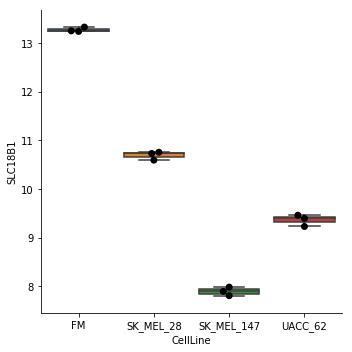

In [17]:
# Generate an overlayed boxplot/swarm plot of each cell line's expression of the top gene. 
# Try to choose a pretty color palette.
g = sns.catplot(x="CellLine", y="SLC18B1", kind="box", data=dfT)
sns.swarmplot(x="CellLine", y="SLC18B1", color="k", size=7, data=dfT, ax=g.ax)
plt.show()

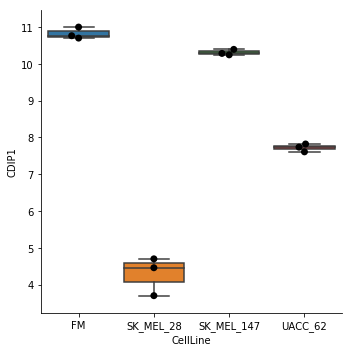

In [16]:
# Generate an overlayed boxplot/swarm plot of each cell line's expression of the second most significant gene. 
# Try to choose a pretty color palette.
g = sns.catplot(x="CellLine", y="CDIP1", kind="box", data=dfT)
sns.swarmplot(x="CellLine", y="CDIP1", color="k", size=7, data=dfT, ax=g.ax)
plt.show()

Out of the 2 genes that you plotted, which look like they would be more useful as a marker that distinguishes cancer vs. normal? Would both of them be useful? 
Write the answer in the markdown cell below:

Your Answer: SLC18B1 would be useful but CDIP1 would not. CDIP1 expression is high in both normal and one of the cell lines.

***
#### Optional Extra Practice:

Plot bar plots and swarm of these genes with the cell line type on the x-axes. For the swarm plot, color the points by cancer vs. normal.

These plots are optional to do, and will not be graded. They are only intended to give you some extra practice.

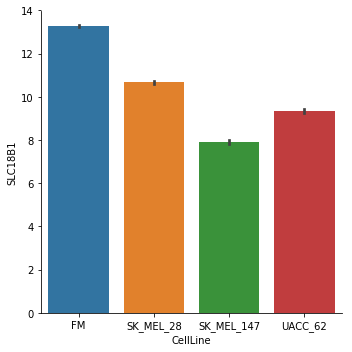

In [26]:
g = sns.catplot(x="CellLine", y="SLC18B1", kind="bar", data=dfT)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


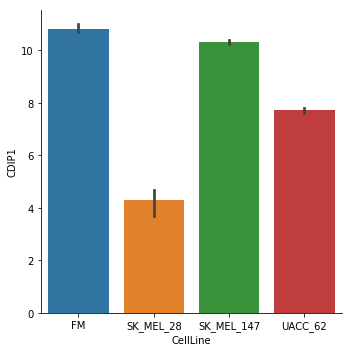

In [25]:
g = sns.catplot(x="CellLine", y="CDIP1", kind="bar", data=dfT)

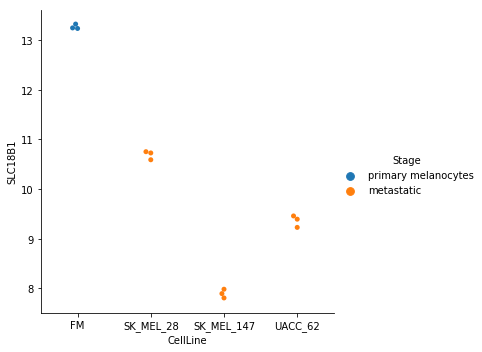

In [27]:
g = sns.catplot(x="CellLine", y="SLC18B1", kind="swarm", data=dfT, hue = 'Stage')

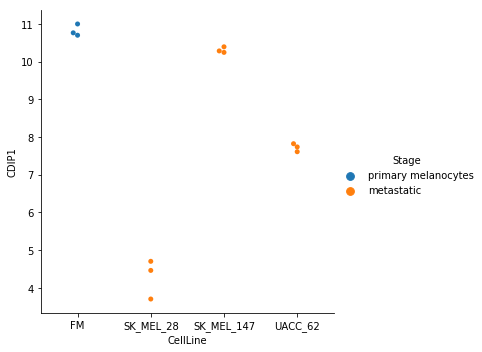

In [28]:
g = sns.catplot(x="CellLine", y="CDIP1", kind="swarm", data=dfT, hue = 'Stage')

***

In [18]:
# Print the names of the top 10 most significant genes, and their associated p-values
print(orderedgenes[0:10],p[pidx[0:10]])

Index(['SLC18B1', 'CDIP1', 'NOMO1', 'RPRD1A', 'BMS1P7', 'WDR19', 'CCDC90B',
       'ZCCHC17', 'MARCKSL1', 'FOXC1'],
      dtype='object') [8.28798509e-12 8.91239992e-09 1.28658853e-08 1.53458476e-07
 1.58657217e-07 2.48496761e-07 5.44394263e-07 1.46985155e-06
 1.55673490e-06 1.76876623e-06]


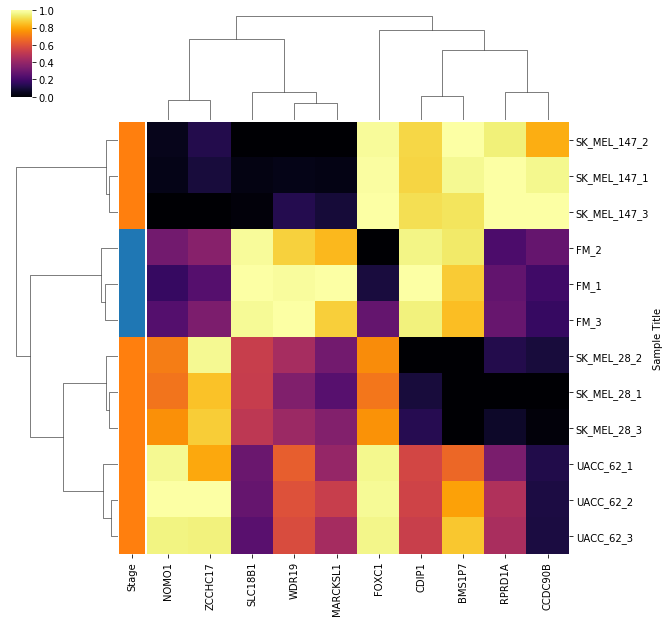

In [24]:
# Generate a clustermap of the expression these 10 genes, with all of the samples in the rows. 
# Make sure to standard scale the expression values, add color bars to label the cancer vs. normal samples, and try a pretty color palette
# (Hint: look at class 8 notes).

# Generate color bars
cancerColor = dict(zip(dfT.loc[:,'Stage'].unique(),sns.color_palette()))
row_colors = dfT.loc[:,'Stage'].map(cancerColor)

# Generate clustermap
g = sns.clustermap(dfT.loc[:,orderedgenes[0:10]],standard_scale=1, row_colors=row_colors,cmap = 'inferno')

Based on this clustermap, which of the 10 genes look like they would be useful as a marker that distinguishes cancer vs. normal? 
Write the answer in the markdown cell below:

Your Answer: SLC18B1, WDR19, MARCKSL1, and FOXC1 would be most useful.

***
#### Optional Extra Practice:

Plot a clustergram with the top 20 genes, and add color bars to label each of the four cell line types.

This is optional to do, and will not be graded. They are only intended to give you some extra practice.

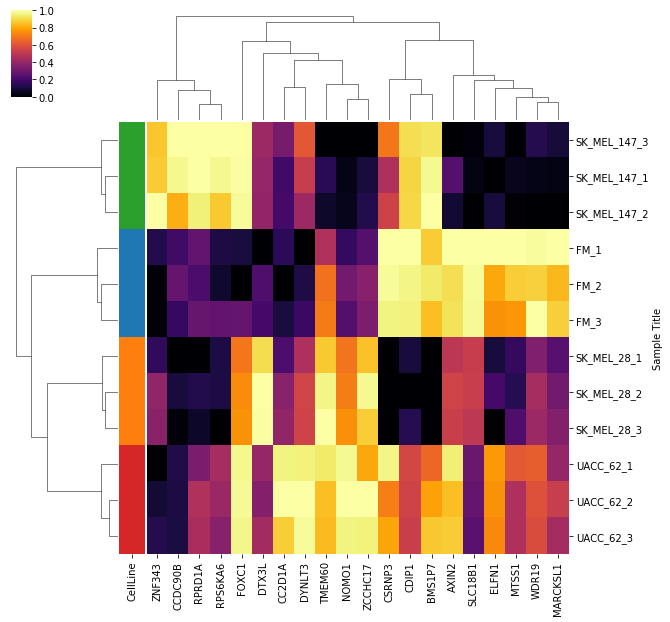

In [29]:
# Generate color bars
cellColor = dict(zip(dfT.loc[:,'CellLine'].unique(),sns.color_palette()))
row_colors = dfT.loc[:,'CellLine'].map(cellColor)

# Generate clustermap
g = sns.clustermap(dfT.loc[:,orderedgenes[0:20]],standard_scale=1, row_colors=row_colors,cmap = 'inferno')